# Unit 5 - Financial Planning

In [4]:
# Initial imports
import os
import requests
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install alpaca-trade-api

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# Set Alpaca API key and secret
#alpaca_api_key = os.getenv("ALPACA_API_KEY")
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
# Fetch current BTC price
# YOUR CODE HERE!
response = requests.get(btc_url)
response = response.json()
btc_price = response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
response = requests.get(eth_url)
response = response.json()
eth_price = response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57325.20
The current value of your 5.3 ETH is $16959.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [13]:
now_day = datetime.now()
today = now_day.strftime("%Y-%m-%d")
past_1_year = (now_day - timedelta(days=(365*1))).strftime("%Y-%m-%d")
past_5_year = (now_day - timedelta(days=(365*5))).strftime("%Y-%m-%d")

In [14]:
past_1_year

'2020-08-27'

In [15]:
# Format current date as ISO format
# YOUR CODE HERE!
timeframe = "1D"
start = pd.Timestamp(today, tz="America/New_York").isoformat()
end = pd.Timestamp(today, tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
price_spy_agg = api.get_barset(tickers, timeframe, start=start, end=end, limit=10).df

# Preview DataFrame
# YOUR CODE HERE!
price_spy_agg.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
2021-08-27 00:00:00-04:00  115.81  115.94  115.7146  115.925  2241357  447.12   

                                                              
                             high     low    close    volume  
2021-08-27 00:00:00-04:00  449.67  447.06  449.495  12326028

In [16]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(price_spy_agg['AGG']['close'])
spy_close_price = float(price_spy_agg['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.925
Current SPY closing price: $449.495


In [17]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $22,474.75
The current value of your 200 AGG shares is $23,185.00


### Savings Health Analysis

In [18]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
cryptos = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({'amount' : {'crypto': cryptos, 'shares': shares}})
# Display savings DataFrame
display(df_savings)

,amount
crypto,74284.405
shares,45659.750


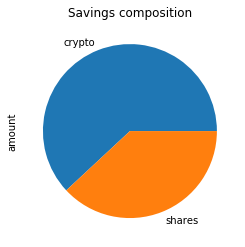

In [19]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.amount.plot.pie(title='Savings composition')

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Emergency fund : {emergency_fund}")
# Calculate total amount of savings
# YOUR CODE HERE!
savings = df_savings.amount.sum()
print(f"Totam amount of savings : {savings:.02f}")
# Validate saving health
# YOUR CODE HERE!
if savings > emergency_fund:
    print("Savings are validated")
else:
    print("Savings are less than the necessary emergency fund amount")

Emergency fund : 36000
Totam amount of savings : 119944.15
Savings are validated


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp(past_5_year, tz='America/New_York').isoformat()
end_date = pd.Timestamp(today, tz='America/New_York').isoformat()

In [22]:
# start_date
print(start_date, end_date)

2016-08-28T00:00:00-04:00 2021-08-27T00:00:00-04:00


In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2017-09-07 00:00:00-04:00  110.43  110.66  110.42  110.58  1526058.0     NaN   
2017-09-08 00:00:00-04:00  110.54  110.58  110.43  110.43  2004746.0  246.53   
2017-09-11 00:00:00-04:00  110.27  110.29  110.10  110.14  1986181.0  248.04   
2017-09-12 00:00:00-04:00  110.04  110.06  109.92  109.98  1827871.0  249.63   
2017-09-13 00:00:00-04:00  110.00  110.04  109.86  109.86  1125316.0  249.73   

                                                               
                             high     low   close      volume  
2017-09-07 00:00:00-04:00     NaN     NaN     NaN         NaN  
2017-09-08 00:00:00-04:00  247.11  246.30  246.55  39326387.0  
2017-09-11 00:00:00-04:00  249.30  248.02  249.17  48756933.0  
2017-09-12 00:00:00-04:00  250.07  249.42  250.07  42765330.0  
2017-09-13 00:00:00-04:00  250.21  249.59  250.18  30812116.0

In [24]:
remaining_from_5_years = datetime(2017, 9, 7, 0, 0, 0)
print(start_date, remaining_from_5_years, end_date)

2016-08-28T00:00:00-04:00 2017-09-07 00:00:00 2021-08-27T00:00:00-04:00


In [25]:
remaining_from_5_years = df_stock_data.index[0].strftime("%Y-%m-%d")
df_stock_data_bis = api.get_barset(tickers, timeframe, start=start_date, end=remaining_from_5_years, limit=1000).df

df_stock_data_bis

AGG                                         \
                             open     high       low    close     volume   
2017-09-07 00:00:00-04:00  110.43  110.660  110.4200  110.580  1526058.0   
2017-09-08 00:00:00-04:00  110.54  110.580  110.4300  110.430  2004746.0   
2017-09-11 00:00:00-04:00  110.27  110.290  110.1000  110.140  1986181.0   
2017-09-12 00:00:00-04:00  110.04  110.060  109.9200  109.980  1827871.0   
2017-09-13 00:00:00-04:00  110.00  110.040  109.8600  109.860  1125316.0   
...                           ...      ...       ...      ...        ...   
2021-08-23 00:00:00-04:00  116.09  116.180  116.0400  116.175  5580303.0   
2021-08-24 00:00:00-04:00  116.08  116.140  115.9600  115.980  4421916.0   
2021-08-25 00:00:00-04:00  115.99  116.011  115.6810  115.760  5204036.0   
2021-08-26 00:00:00-04:00  115.76  115.790  115.6444  115.785  4730638.0   
2021-08-27 00:00:00-04:00  115.81  115.940  115.7146  115.925  2241357.0   

                              SPY                                          
                             open     high       low    close      volume  
2017-09-07 00:00:00-04:00     NaN      NaN       NaN      NaN         NaN  
2017-09-08 00:00:00-04:00  246.53  247.110  246.3000  246.550  39326387.0  
2017-09-11 00:00:00-04:00  248.04  249.300  248.0200  249.170  48756933.0  
2017-09-12 00:00:00-04:00  249.63  250.070  249.4200  250.070  42765330.0  
2017-09-13 00:00:00-04:00  249.73  250.210  249.5900  250.180  30812116.0  
...                           ...      ...       ...      ...         ...  
2021-08-23 00:00:00-04:00  445.16  448.230  443.4355  447.260  49349485.0  
2021-08-24 00:00:00-04:00  447.97  448.540  447.4200  447.950  33180117.0  
2021-08-25 00:00:00-04:00  448.17  449.457  447.7700  448.880  35262175.0  
2021-08-26 00:00:00-04:00  448.61  448.860  446.1600  446.270  53455704.0  
2021-08-27 00:00:00-04:00  447.12  449.670  447.0600  449.495  12326028.0  

[1001 rows x 10 columns]

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 500

# Configure a Monte Carlo simulation to forecast thirty years daily returns
MC_Stock_Data = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [27]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Stock_Data.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2017-09-07 00:00:00-04:00  110.43  110.66  110.42  110.58  1526058.0   
2017-09-08 00:00:00-04:00  110.54  110.58  110.43  110.43  2004746.0   
2017-09-11 00:00:00-04:00  110.27  110.29  110.10  110.14  1986181.0   
2017-09-12 00:00:00-04:00  110.04  110.06  109.92  109.98  1827871.0   
2017-09-13 00:00:00-04:00  110.00  110.04  109.86  109.86  1125316.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2017-09-07 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-09-08 00:00:00-04:00    -0.001356  246.53  247.11  246.30  246.55   
2017-09-11 00:00:00-04:00    -0.002626  248.04  249.30  248.02  249.17   
2017-09-12 00:00:00-04:00    -0.001453  249.63  250.07  249.42  250.07   
2017-09-13 00:00:00-04:00    -0.001091  249.73  250.21  249.59  250.18   

                                                    
                               volume daily_return  
2017-09-07 00:00:00-04:00         NaN          NaN  
2017-09-08 00:00:00-04:00  39326387.0          NaN  
2017-09-11 00:00:00-04:00  48756933.0     0.010627  
2017-09-12 00:00:00-04:00  42765330.0     0.003612  
2017-09-13 00:00:00-04:00  30812116.0     0.000440

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Stock_Data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999995,1.006131,0.994650,0.999192,1.000000,0.993105,1.002201,0.983366,0.990498,1.013636,...,0.996655,1.015705,1.016923,0.992127,1.006225,1.000688,1.007283,1.008790,1.002288,0.986145
2,0.998685,0.996794,0.995580,1.003582,1.009116,0.987107,1.003343,0.967823,0.992483,1.017012,...,1.004622,1.011077,1.025524,1.007907,0.993468,1.004823,1.013056,1.012094,1.010729,0.985278
3,1.001771,0.994866,0.998028,1.000306,1.011688,0.983113,1.013298,0.969118,0.988758,1.015892,...,1.014428,1.024756,1.022715,1.027722,0.980866,1.018783,1.022909,1.009900,1.013533,0.987116
4,1.009140,0.992010,1.009722,0.999434,1.026070,0.986146,1.012068,0.963079,0.984750,1.016735,...,1.004560,1.017463,1.028038,1.019675,0.985792,1.008208,1.023707,1.025911,1.019555,0.984175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.494063,37.921724,17.141093,19.367054,24.257879,56.069598,6.794953,42.433531,46.894844,13.835899,...,8.769401,13.962648,19.318095,65.051030,26.445261,29.220804,29.327184,33.708334,27.763374,30.800766
7557,18.367944,37.818747,17.231876,19.490527,24.365104,55.250667,6.739056,42.593952,47.142323,13.745472,...,8.806739,13.955947,19.103010,64.652066,26.204130,29.279581,29.320440,33.655780,27.805515,31.101695
7558,17.955056,37.683798,16.951463,19.492378,24.604744,56.206867,6.758199,42.856276,46.922008,13.766471,...,8.854504,14.142080,19.280592,65.175047,26.328618,29.422025,29.304210,33.473729,27.660150,31.653468
7559,17.773538,37.700490,16.826140,19.332154,24.767563,56.612204,6.771549,43.099182,46.829651,13.614768,...,8.893254,13.981235,19.365628,65.514497,26.502605,29.398930,29.251734,33.493426,27.912429,31.823716


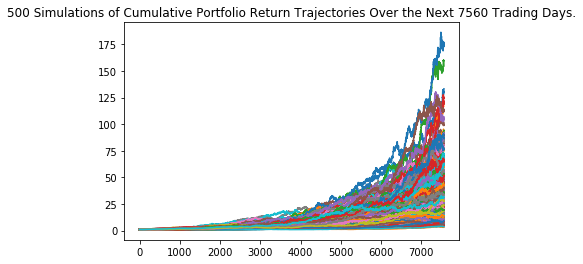

In [30]:
# Plot simulation outcomes
# YOUR CODE HERE!
simulation_plot = MC_Stock_Data.plot_simulation()

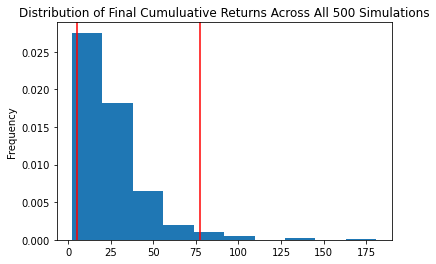

In [61]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = MC_Stock_Data.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = MC_Stock_Data.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean             27.408993
std              22.431491
min               3.104509
25%              13.473646
50%              20.883701
75%              32.299420
max             174.499513
95% CI Lower      5.792623
95% CI Upper     90.504979
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
MC_Stock_Data.confidence_interval

95% CI Lower     5.792623
95% CI Upper    90.504979
Name: 7560, dtype: float64

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
lb = MC_Stock_Data.confidence_interval["95% CI Lower"]
ub = MC_Stock_Data.confidence_interval["95% CI Upper"]

ci_upper = initial_investment * ub
ci_lower = initial_investment * lb

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.02f} and ${ci_upper:.02f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $115852.47 and $1810099.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
lb = MC_Stock_Data.confidence_interval["95% CI Lower"]
ub = MC_Stock_Data.confidence_interval["95% CI Upper"]

ci_upper = initial_investment * ub
ci_lower = initial_investment * lb

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.02f} and ${ci_upper:.02f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $173778.70 and $2715149.36


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_Stock_Data = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_Stock_Data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009686,1.000589,0.990243,0.995980,1.000666,1.001511,0.989317,1.003222,1.004752,0.991280,...,1.019430,0.998499,0.997622,0.993962,1.003693,1.024157,1.010130,0.991053,0.999030,1.006420
2,1.010708,0.991660,0.985209,0.996532,1.005662,1.001681,0.979518,1.002811,1.005819,0.986455,...,1.022972,1.007752,0.987181,0.981059,1.001930,1.018579,1.001743,0.973508,0.999911,1.009469
3,1.007875,0.985444,1.001702,0.995751,1.011675,1.011517,0.976452,1.009268,1.012510,0.982831,...,1.015836,1.006727,0.982806,0.980148,0.981044,1.018532,1.008692,0.970488,1.012839,1.025178
4,1.013532,0.970641,1.001106,0.995334,1.016543,1.022718,0.971564,1.005844,1.013253,0.981633,...,1.017701,1.003353,0.992574,0.982670,0.982389,1.010433,1.016887,0.965679,1.010462,1.018620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.822897,2.168036,1.304698,1.025401,1.990299,1.812774,2.124934,1.785204,2.285247,1.272179,...,2.190901,1.555404,1.694134,2.102841,1.220572,1.947657,2.250056,2.001204,1.784786,1.736994
1257,1.833752,2.129567,1.298171,1.034892,1.968702,1.817115,2.099082,1.783973,2.272530,1.263024,...,2.217110,1.567790,1.704203,2.135962,1.215913,1.950732,2.248836,2.005133,1.773958,1.747393
1258,1.826727,2.119685,1.295059,1.030447,1.952823,1.813317,2.101703,1.789532,2.252244,1.253618,...,2.232526,1.581279,1.700058,2.158475,1.203527,1.941065,2.198745,2.015274,1.775146,1.756738
1259,1.807994,2.095884,1.291774,1.042074,1.953157,1.797646,2.111324,1.796263,2.257693,1.254600,...,2.228707,1.578156,1.703577,2.140065,1.198815,1.921551,2.198077,2.039247,1.785224,1.745447


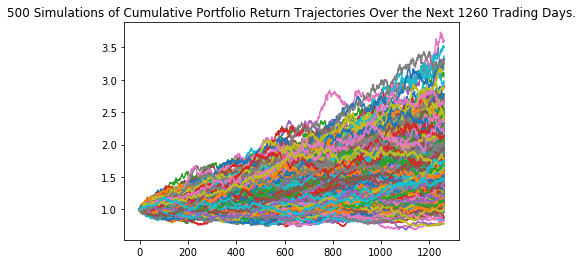

In [39]:
# Plot simulation outcomes
# YOUR CODE HERE!
simulation_plot = MC_Stock_Data.plot_simulation()

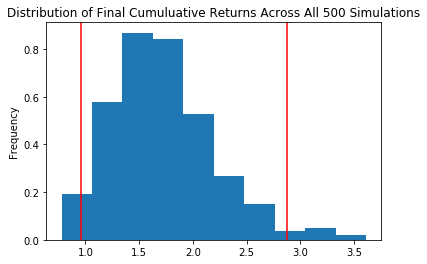

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = MC_Stock_Data.plot_distribution()

In [41]:
# YOUR CODE HERE!
summary = MC_Stock_Data.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean              1.728832
std               0.484232
min               0.777842
25%               1.397547
50%               1.664674
75%               2.018424
max               3.609925
95% CI Lower      0.957498
95% CI Upper      2.876766
Name: 1260, dtype: float64


In [42]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 100000.

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
lb = MC_Stock_Data.confidence_interval["95% CI Lower"]
ub = MC_Stock_Data.confidence_interval["95% CI Upper"]

ci_upper = initial_investment * ub
ci_lower = initial_investment * lb

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.02f} and ${ci_upper:.02f}")

There is a 95% chance that an initial investment of $100000.0 in the portfolio over the next 30 years will end within in the range of $95749.81 and $287676.56


### Ten Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Stock_Data = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Stock_Data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012160,0.988760,1.007039,0.998336,0.989610,1.001081,1.008103,1.009997,1.005312,0.998934,...,1.001091,1.012025,1.006037,1.022294,1.008764,1.003627,1.020581,0.992065,0.990214,1.001067
2,1.015230,0.982266,1.011238,0.983139,0.998699,1.004849,1.007417,1.007691,1.017163,0.998089,...,0.995210,1.014802,1.009809,1.035030,1.003082,0.997963,1.015454,0.989677,1.003336,0.996998
3,1.018541,0.981395,1.017242,0.974565,0.998773,1.017535,1.017934,0.997035,1.022341,0.986047,...,0.994459,1.001958,1.013385,1.033801,1.001222,1.009437,1.020616,0.995361,1.002734,0.997810
4,1.036780,0.987896,1.025251,0.979603,0.999713,1.015764,1.013480,1.002676,1.040105,0.976863,...,0.998653,1.001955,1.019626,1.049425,1.002172,1.017658,1.020585,1.008888,0.996242,1.001287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.074651,4.098860,2.206913,3.116083,3.063483,2.052429,5.128292,3.041662,3.608819,1.824470,...,3.589392,1.228761,2.071901,3.946611,2.315753,1.905788,1.918158,2.309651,3.979501,4.361596
2517,3.087491,4.132613,2.214057,3.141180,3.104787,2.082671,5.135463,3.041779,3.648551,1.827459,...,3.575411,1.242251,2.067895,3.949104,2.335545,1.922161,1.923346,2.301376,3.960390,4.310431
2518,3.099273,4.160781,2.205650,3.135805,3.031121,2.077999,5.108882,2.995390,3.635866,1.822042,...,3.582922,1.235811,2.060661,3.927092,2.364010,1.950993,1.941660,2.302580,4.002959,4.307021
2519,3.095278,4.178245,2.208777,3.134721,3.034533,2.075477,5.072908,2.999811,3.607162,1.803136,...,3.588011,1.225236,2.061338,3.965883,2.329816,1.961609,1.931218,2.309319,4.075006,4.260036


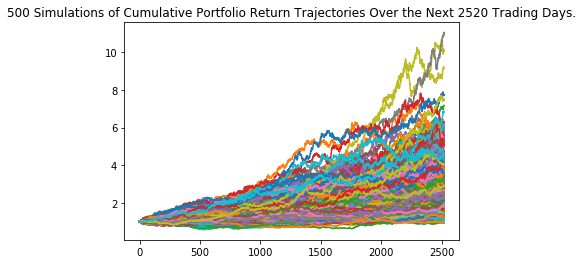

In [45]:
# Plot simulation outcomes
# YOUR CODE HERE!
simulation_plot = MC_Stock_Data.plot_simulation()

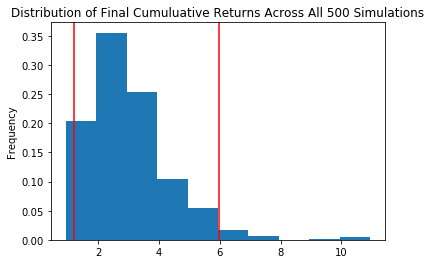

In [46]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = MC_Stock_Data.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = MC_Stock_Data.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean              2.966907
std               1.310602
min               0.937342
25%               2.068124
50%               2.751731
75%               3.585059
max              10.945592
95% CI Lower      1.219223
95% CI Upper      5.961203
Name: 2520, dtype: float64


In [48]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 100000.

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
lb = MC_Stock_Data.confidence_interval["95% CI Lower"]
ub = MC_Stock_Data.confidence_interval["95% CI Upper"]

ci_upper = initial_investment * ub
ci_lower = initial_investment * lb

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.02f} and ${ci_upper:.02f}")

There is a 95% chance that an initial investment of $100000.0 in the portfolio over the next 30 years will end within in the range of $121922.27 and $596120.31
